In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import time

import models

In [2]:
# load the data. It may take a while
data = sio.loadmat("./data/data_120_10000.mat")

In [3]:
lamb = data["lamb"]
sols = data["sols"]
fs = data["fs"]
xx = data["xx"]
yy = data["yy"]
xi = data["xi"]

N = 10000
u_ref = sols[:N, ...]
f_ref = fs[:N, ...]
x_train = xx[::2, ::2].reshape([-1, 1])
y_train = yy[::2, ::2].reshape([-1, 1])
f_train = f_ref[:, ::2, ::2].reshape([N, -1])
f_train = f_train.T

In [4]:
mhpinn = models.MHPINN(
    num_tasks=N, dim=200, name="mhpinn6",
)

In [5]:
# t0 = time.time()
# loss = mhpinn.train(x_train, y_train, f_train, niter=50000, ftol=1e-6)
# t1 = time.time()

In [6]:
mhpinn.restore()
xx = data["xx"].reshape([-1, 1])
yy = data["yy"].reshape([-1, 1])
xx_test = tf.constant(xx, tf.float32)
yy_test = tf.constant(yy, tf.float32)
u_pred = mhpinn.call(xx_test, yy_test, mhpinn.heads).numpy()
u_pred = u_pred.reshape([101, 101, N])
u_pred = np.transpose(u_pred, [2, 0, 1])

f_pred = mhpinn.pde(xx_test, yy_test, mhpinn.heads).numpy()
f_pred = f_pred.reshape([101, 101, N])
f_pred = np.transpose(f_pred, [2, 0, 1])

In [7]:
L2 = np.sqrt(np.sum(np.sum((u_ref - u_pred)**2, axis=-1), axis=-1) / np.sum(np.sum(u_ref**2, axis=-1), axis=-1))

In [8]:
np.mean(L2), np.std(L2)

(0.008346628885014943, 0.005845721516878484)

In [9]:
np.mean(L2), np.std(L2)

(0.008346628885014943, 0.005845721516878484)

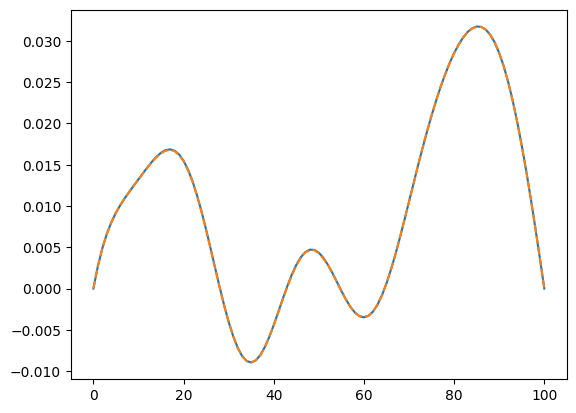

In [10]:
k = 100
j = 10
plt.plot(u_ref[k, :, j])
plt.plot(u_pred[k, :, j], "--")

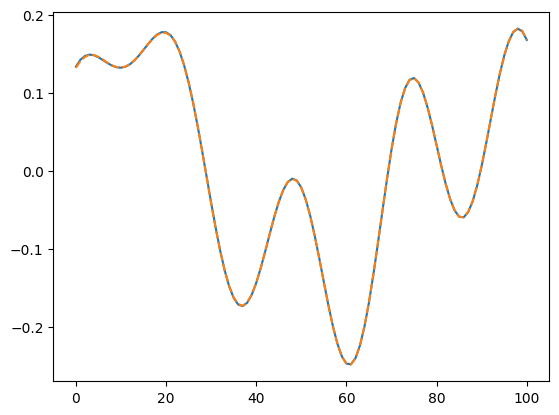

In [17]:
k = 100
j = 90
plt.plot(f_ref[k, :, j])
plt.plot(f_pred[k, :, j], "--")

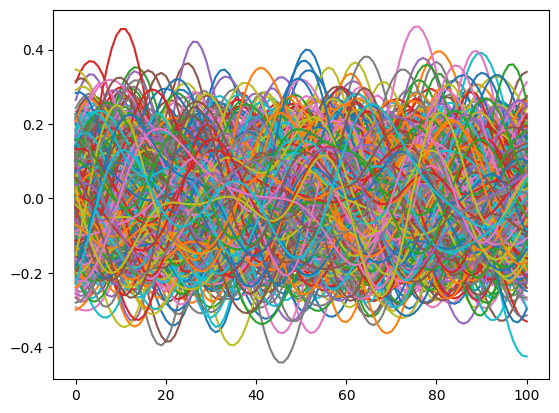

In [13]:
j = 51
for i in range(1000):
    plt.plot(f_ref[i, :, j])

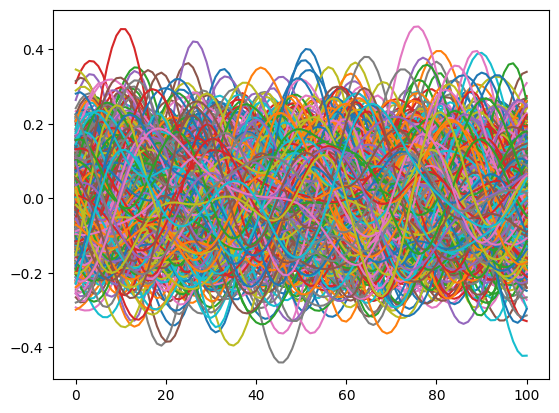

In [14]:
j = 51
for i in range(1000):
    plt.plot(f_pred[i, :, j])